In [16]:
import numpy as np
import pandas as pd
import json
from numpy import *

Below afre the code for generating the data for the edgebundling things
two files will be generated:
#1. all the nodes
#2. all the paths {source: , target: }

In [17]:
startend=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_pathstartend.csv')
startend

,Id,start_area_name,start_place_name,end_area_name,end_place_name,start_time,end_time,start_lon,start_lat,end_lon,end_lat
0,2130036,Italy,Florence,Switzerland,Zurich,1481,1481,11.24626,43.77925,8.55000,47.36667
1,2011876,Italy,Florence,France,Paris,1481,1797,11.24626,43.77925,2.34880,48.85341
2,2013851,Italy,Florence,Greece,Athens,1481,2015,11.24626,43.77925,23.72784,37.98376
3,2141340,Italy,Florence,Italy,Genoa,1481,1765,11.24626,43.77925,8.94439,44.40478
4,2140781,Italy,Florence,Italy,Florence,1481,1752,11.24626,43.77925,11.24626,43.77925
...,...,...,...,...,...,...,...,...,...,...,...
168,201623,Italy,Florence,United States,Cambridge,1481,1951,11.24626,43.77925,-71.10561,42.37510
169,2140702,Italy,Florence,Italy,Florence,1481,1885,11.24626,43.77925,11.24626,43.77925
170,2141122,Italy,Florence,Germany,Dresden,1481,1775,11.24626,43.77925,13.73832,51.05089
171,2001011,Italy,Florence,United Kingdom,London,1481,1821,11.24626,43.77925,-0.12574,51.50853


In [23]:
startend.sort_values('end_area_name').end_area_name.unique()

array([' Austria', ' Belarus', ' Belgium', ' Brazil', ' Denmark',
       ' France', ' Germany', ' Greece', ' Italy', ' Japan', ' Latvia',
       ' Netherlands', ' NoInfo', ' Poland', ' Russia', ' Spain',
       ' Sweden', ' Switzerland', ' United Kingdom', ' United States',
       ' Vatican City', 'Italy'], dtype=object)

In [4]:
prov=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_provpath_new.csv')
prov

,Id,lat1,lat2,lon1,lon2,time1,time2,stay,area1,area2,place1,place2,auto_id
0,2130036,43.77925,47.36667,11.24626,8.55000,1481,1481,0,Italy,Switzerland,Florence,Zurich,1
1,2011876,43.77925,45.43890,11.24626,12.33092,1481,1481,0,Italy,Italy,Florence,Venice,2
2,2011876,45.43890,45.43890,12.33092,12.33092,1797,1701,-96,Italy,Italy,Venice,Venice,3
3,2011876,45.43890,48.85341,12.33092,2.34880,1800,1797,-3,Italy,France,Venice,Paris,4
4,2013851,43.77925,42.83333,11.24626,12.83333,1481,1501,20,Italy,Italy,Florence,Italy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2140726,43.77925,42.83333,11.24626,12.83333,1481,1481,0,Italy,Italy,Florence,NoInfo,681
681,2140726,42.83333,42.83333,12.83333,12.83333,1500,1481,-19,Italy,Italy,NoInfo,NoInfo,682
682,2140726,42.83333,48.37154,12.83333,10.89851,1700,1730,30,Italy,Germany,NoInfo,Augsburg,683
683,2140726,48.37154,48.37154,10.89851,10.89851,1700,1808,108,Germany,Germany,Augsburg,Augsburg,684


In [5]:

flat=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_flat.csv')
flat


,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx
...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo


In [6]:
'''
var nodes = {
    "0": { "x": 922.24444, "y": 347.29444 },
    "1": { "x": 814.42222, "y": 409.16111 },
    "2": { "x": 738, "y": 427.33333000000005 },
    "3": { "x": 784.5, "y": 381.33333 },
    "4": { "x": 1066.09167, "y": 350.40278 },
    "5": { "x": 925.4861099999999, "y": 313.275 }
}

var edges = [{ "source": "0", "target": "1" },
    { "source": "4", "target": "2" },
    { "source": "0", "target": "3" },
    { "source": "0", "target": "4" },
    { "source": "2", "target": "5" },
    { "source": "3", "target": "2" },
    { "source": "3", "target": "4" }
]
'''


'\nvar nodes = {\n    "0": { "x": 922.24444, "y": 347.29444 },\n    "1": { "x": 814.42222, "y": 409.16111 },\n    "2": { "x": 738, "y": 427.33333000000005 },\n    "3": { "x": 784.5, "y": 381.33333 },\n    "4": { "x": 1066.09167, "y": 350.40278 },\n    "5": { "x": 925.4861099999999, "y": 313.275 }\n}\n\nvar edges = [{ "source": "0", "target": "1" },\n    { "source": "4", "target": "2" },\n    { "source": "0", "target": "3" },\n    { "source": "0", "target": "4" },\n    { "source": "2", "target": "5" },\n    { "source": "3", "target": "2" },\n    { "source": "3", "target": "4" }\n]\n'

In [11]:
nodes=dict()
for i in range (0,len(flat.Id)):
    nodes[str(i)]={"x":flat.Lon[i], "y":flat.Lat[i],"Id":str(flat.Id[i]), "Country":flat.AreaName[i], "City":flat.PlaceName[i]}
    #nodes[str(i)]={"x":flat.Lon[i], "y":flat.Lat[i]}
    print(nodes[str(i)])
    #print (nodes_json)

{'x': 11.246260000000001, 'y': 43.77925, 'Id': '2130036', 'Country': 'Italy', 'City': 'Florence'}
{'x': 8.55, 'y': 47.36667, 'Id': '2130036', 'Country': 'Switzerland', 'City': 'Zurich'}
{'x': 11.246260000000001, 'y': 43.77925, 'Id': '2011876', 'Country': 'Italy', 'City': 'Florence'}
{'x': 12.330919999999999, 'y': 45.4389, 'Id': '2011876', 'Country': 'Italy', 'City': 'Venice'}
{'x': 12.330919999999999, 'y': 45.4389, 'Id': '2011876', 'Country': 'Italy', 'City': 'Venice'}
{'x': 2.3488, 'y': 48.85341, 'Id': '2011876', 'Country': 'France', 'City': 'Paris'}
{'x': 11.246260000000001, 'y': 43.77925, 'Id': '2013851', 'Country': 'Italy', 'City': 'Florence'}
{'x': 12.83333, 'y': 42.83333, 'Id': '2013851', 'Country': 'Italy', 'City': 'Italy'}
{'x': 12.83333, 'y': 42.83333, 'Id': '2013851', 'Country': 'NoInfo', 'City': 'NoInfo'}
{'x': 0.6746300000000001, 'y': 51.7311, 'Id': '2013851', 'Country': 'United Kingdom', 'City': 'Maldon'}
{'x': -0.12574000000000002, 'y': 51.50853, 'Id': '2013851', 'Country

In [12]:
edges=list()
edge_inner=dict()
initial_Id=nodes['0']['Id']
for i in range(1,len(nodes)):
    Id = nodes[str(i)]['Id']
    if Id == initial_Id:
        edge_inner["source"]=str(i-1)
        edge_inner["target"]=str(i)
        edge_inner["Id"]=Id
        edge_inner["sourceCountry"]=nodes[str(i-1)]['Country']
        edge_inner["targetCountry"]=nodes[str(i)]['Country']
        #print(edge_inner)
        edges.append(edge_inner.copy())
        #print(edges)
    else:
        initial_Id = Id 
print(edges)
print(len(edges))

    


[{'source': '0', 'target': '1', 'Id': '2130036', 'sourceCountry': 'Italy', 'targetCountry': 'Switzerland'}, {'source': '2', 'target': '3', 'Id': '2011876', 'sourceCountry': 'Italy', 'targetCountry': 'Italy'}, {'source': '3', 'target': '4', 'Id': '2011876', 'sourceCountry': 'Italy', 'targetCountry': 'Italy'}, {'source': '4', 'target': '5', 'Id': '2011876', 'sourceCountry': 'Italy', 'targetCountry': 'France'}, {'source': '6', 'target': '7', 'Id': '2013851', 'sourceCountry': 'Italy', 'targetCountry': 'Italy'}, {'source': '7', 'target': '8', 'Id': '2013851', 'sourceCountry': 'Italy', 'targetCountry': 'NoInfo'}, {'source': '8', 'target': '9', 'Id': '2013851', 'sourceCountry': 'NoInfo', 'targetCountry': 'United Kingdom'}, {'source': '9', 'target': '10', 'Id': '2013851', 'sourceCountry': 'United Kingdom', 'targetCountry': 'United Kingdom'}, {'source': '10', 'target': '11', 'Id': '2013851', 'sourceCountry': 'United Kingdom', 'targetCountry': 'Greece'}, {'source': '11', 'target': '12', 'Id': '2

In [13]:
#convert to json
#type(nodes)
edges_json = json.dumps(edges)
nodes_json = json.dumps(nodes)

In [14]:
#write json file for both edges and nodes
with open("edges_withID.json", "w") as jsonfile:
    jsonfile.write(edges_json)

In [15]:
with open("nodes_withID.json", "w") as jsonfile:
    jsonfile.write(nodes_json)

Date: 29 May 2022
Description: data cleaning for the heatmap visualization

Task 1:
-Using prov data, calculate the origin and destination for each prov, aggregated by country/city.
-The output .csv filr should be like: group--x axis; variable--y axis; value--square 

| group | variable | value |
| Italy | UK       | 103   |
| Italy | Germany  | 54    |
......

In [200]:
prov=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_provpath_new.csv')
prov

,Id,lat1,lat2,lon1,lon2,time1,time2,stay,area1,area2,place1,place2,auto_id
0,2130036,43.77925,47.36667,11.24626,8.55000,1481,1481,0,Italy,Switzerland,Florence,Zurich,1
1,2011876,43.77925,45.43890,11.24626,12.33092,1481,1481,0,Italy,Italy,Florence,Venice,2
2,2011876,45.43890,45.43890,12.33092,12.33092,1797,1701,-96,Italy,Italy,Venice,Venice,3
3,2011876,45.43890,48.85341,12.33092,2.34880,1800,1797,-3,Italy,France,Venice,Paris,4
4,2013851,43.77925,42.83333,11.24626,12.83333,1481,1501,20,Italy,Italy,Florence,Italy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2140726,43.77925,42.83333,11.24626,12.83333,1481,1481,0,Italy,Italy,Florence,NoInfo,681
681,2140726,42.83333,42.83333,12.83333,12.83333,1500,1481,-19,Italy,Italy,NoInfo,NoInfo,682
682,2140726,42.83333,48.37154,12.83333,10.89851,1700,1730,30,Italy,Germany,NoInfo,Augsburg,683
683,2140726,48.37154,48.37154,10.89851,10.89851,1700,1808,108,Germany,Germany,Augsburg,Augsburg,684


In [201]:

prov_group_by_city=prov.groupby(['place1','place2'],as_index=False)['Id'].count()
prov_group_by_city

,place1,place2,Id
0,Althorp,London,2
1,Althorp,New York,1
2,Amsterdam,Genoa,1
3,Athens,Athens,2
4,Augsburg,Augsburg,2
...,...,...,...
283,Verona,Verona,1
284,Vienna,Minsk,1
285,Vienna,Munich,1
286,Woodstock,New York,1


In [204]:
#group by city full
place1List=list(prov_group_by_city.place1.unique())
place2List=list(prov_group_by_city.place2.unique())
place1ListFull=[]
for i in place1List:
    place1ListFull += [i]*len(place2List)
#print(place1ListFull)
place2ListFull=place2List*len(place1List)



In [206]:
prov_group_by_city_prepare=pd.DataFrame()
prov_group_by_city_prepare['place1']=place1ListFull
prov_group_by_city_prepare['place2']=place2ListFull
prov_group_by_city_prepare['Id']=0
#prov_group_by_city_prepare

In [208]:
prov_group_by_city_full = pd.concat([prov_group_by_city_prepare,prov_group_by_city],axis=0)
prov_group_by_city_full = prov_group_by_city_full.groupby(['place1','place2'],as_index=False)['Id'].agg('sum')
prov_group_by_city_full = prov_group_by_city_full.sort_values(by=['place1','place2'])
#prov_group_by_city_full.columns= ['group','variable','value']
max(prov_group_by_city_full.Id)

116

In [215]:
description0=[]
for i in range(0,len(prov_group_by_city_full)):
    if prov_group_by_city_full.Id[i] != 0:
        relatedId0=prov[prov.place1==prov_group_by_city_full.place1[i]][prov.place2==prov_group_by_city_full.place2[i]].Id.astype('string').to_list()
        relatedId0_str=','.join(relatedId0)
    else:
        relatedId0_str='None'
        #print(relatedId_str)
    description0.append(relatedId0_str)
#print(description0)

prov_group_by_city_full['detail']=description0
#print(prov_group_by_city_full)

<ipython-input-215-6448600773f6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relatedId0=prov[prov.place1==prov_group_by_city_full.place1[i]][prov.place2==prov_group_by_city_full.place2[i]].Id.astype('string').to_list()


In [216]:
prov_group_by_city_full.columns=['group', 'variable', 'value','detail']
prov_group_by_city_full.to_csv('heatmap1_bycity.csv',index=False)

In [ ]:
'''
description0=[]
for i in range(0,len(prov_group_by_city)):
    relatedId0=prov[prov.place1==prov_group_by_city.place1[i]][prov.place2==prov_group_by_city.place2[i]].Id.astype('string').to_list()
    relatedId0_str=','.join(relatedId0)
    #print(relatedId_str)
    description0.append(relatedId0_str)
#print(description)

prov_group_by_city['detail']=description0
print(prov_group_by_city)
'''

In [ ]:
#prov_group_by_city.columns=['group', 'variable', 'value','detail']
#prov_group_by_city.to_csv('heatmap1_bycity.csv',index=False)

In [ ]:
#prov_group_by_city.to_csv('heatmap1_bycity.csv',index=False)

In [218]:
prov_group_by_country=prov.groupby(['area1','area2'],as_index=False)['Id'].count()
prov_group_by_country

,area1,area2,Id
0,Austria,Belarus,1
1,Austria,Germany,1
2,Belgium,Italy,1
3,Brazil,Brazil,1
4,Denmark,Denmark,1
...,...,...,...
76,United States,United Kingdom,1
77,United States,United States,32
78,Vatican City,France,1
79,Vatican City,United States,1


In [219]:
#group by country full
area1List=list(prov_group_by_country.area1.unique())
area2List=list(prov_group_by_country.area2.unique())
area1ListFull=[]
for i in area1List:
    area1ListFull += [i]*len(area2List)
#print(area1ListFull)
area2ListFull=area2List*len(area1List)

In [220]:
prov_group_by_country_prepare=pd.DataFrame()
prov_group_by_country_prepare['area1']=area1ListFull
prov_group_by_country_prepare['area2']=area2ListFull
prov_group_by_country_prepare['Id']=0
#prov_group_by_country_prepare

In [221]:
prov_group_by_country_full = pd.concat([prov_group_by_country_prepare,prov_group_by_country],axis=0)
prov_group_by_country_full = prov_group_by_country_full.groupby(['area1','area2'],as_index=False)['Id'].agg('sum')
prov_group_by_country_full = prov_group_by_country_full.sort_values(by=['area1','area2'])
#prov_group_by_country_full.columns= ['group','variable','value']
#max(prov_group_by_country_full.Id)

In [222]:
description=[]
for i in range(0,len(prov_group_by_country_full)):
    if prov_group_by_country_full.Id[i] != 0:
        relatedId=prov[prov.area1==prov_group_by_country_full.area1[i]][prov.area2==prov_group_by_country_full.area2[i]].Id.astype('string').to_list()
        relatedId_str=','.join(relatedId)
    else:
        relatedId_str='None'
        #print(relatedId_str)
    description.append(relatedId_str)
#print(description)

prov_group_by_country_full['detail']=description
#print(prov_group_by_country_full)

<ipython-input-222-596bf2a0b946>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relatedId=prov[prov.area1==prov_group_by_country_full.area1[i]][prov.area2==prov_group_by_country_full.area2[i]].Id.astype('string').to_list()


In [ ]:
'''
description=[]
for i in range(0,len(prov_group_by_country)):
    relatedId=prov[prov.area1==prov_group_by_country.area1[i]][prov.area2==prov_group_by_country.area2[i]].Id.astype('string').to_list()
    relatedId_str=','.join(relatedId)
    #print(relatedId_str)
    description.append(relatedId_str)
#print(description)

prov_group_by_country['detail']=description
print(prov_group_by_country)
'''
    

            area1           area2  Id  \
0         Austria         Belarus   1   
1         Austria         Germany   1   
2         Belgium           Italy   1   
3          Brazil          Brazil   1   
4         Denmark         Denmark   1   
..            ...             ...  ..   
76  United States  United Kingdom   1   
77  United States   United States  32   
78   Vatican City          France   1   
79   Vatican City   United States   1   
80   Vatican City    Vatican City   1   

                                               detail  
0                                             2141588  
1                                             2140675  
2                                             2141406  
3                                             2142772  
4                                             2140616  
..                                                ...  
76                                            2013774  
77  2141466,2013814,2141268,2141555,2141203,214161...  
78 

<ipython-input-58-8e367139abdc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relatedId=prov[prov.area1==prov_group_by_country.area1[i]][prov.area2==prov_group_by_country.area2[i]].Id.astype('string').to_list()


In [223]:
prov_group_by_country_full.columns=['group', 'variable', 'value','detail']

In [224]:
prov_group_by_country_full

,group,variable,value,detail
0,Austria,Austria,0,None
1,Austria,Belarus,1,2141588
2,Austria,Belgium,0,None
3,Austria,Brazil,0,None
4,Austria,Denmark,0,None
...,...,...,...,...
432,Vatican City,Switzerland,0,None
433,Vatican City,Ukraine,0,None
434,Vatican City,United Kingdom,0,None
435,Vatican City,United States,1,2141490


In [225]:
prov_group_by_country_full.to_csv('heatmap1_bycountry.csv',index=False)

Task 2:
-Using flat data, counting the number of coutries at each time period for each book.
-The output .csv filr should be like: group--x axis; variable--y axis; value--square 

| group | variable | value |
| 15c   | book001  | 3     |
| 15.5c | book002  | 2     |
......

In [41]:
flat=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_flat.csv')
flat

,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx
...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo


In [42]:
flat_accurate=flat[flat.StartType=='accurate'][flat.EndType=='accurate']

<ipython-input-42-c26e109d2d08>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat_accurate=flat[flat.StartType=='accurate'][flat.EndType=='accurate']


In [43]:
flat_notknown=flat[flat.StartType!='accurate'][flat.EndType!='accurate']

<ipython-input-43-c6fa5447846a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flat_notknown=flat[flat.StartType!='accurate'][flat.EndType!='accurate']


In [44]:
heatmap2 = pd.DataFrame(columns=['time', 'bookId', 'country','city'])

In [45]:
bookId=list(set(flat.Id))
#bookId=set(bookId)
#bookId=list(bookId)
print(len(bookId))
newbookId=bookId*13

173


In [46]:
century=[15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21]
time=[]
for i in century:
    #print([i]*3)
    time = time+[i]*173
#print(time)
   

In [47]:
heatmap2.time=time

In [48]:
heatmap2.bookId=newbookId

In [49]:
heatmap2

,time,bookId,country,city
0,15.0,2141186,NaN,NaN
1,15.0,2140675,NaN,NaN
2,15.0,2140676,NaN,NaN
3,15.0,2141191,NaN,NaN
4,15.0,2141192,NaN,NaN
...,...,...,...,...
2244,21.0,2140643,NaN,NaN
2245,21.0,2141160,NaN,NaN
2246,21.0,2140648,NaN,NaN
2247,21.0,2141168,NaN,NaN


In [50]:
flat

,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx
...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo


In [51]:
def yearToCentury(year):
    if year >= 1401 and year <=1450:
        return 15
    elif year >= 1451 and year <=1500:
        return 15.5
    elif year >= 1501 and year <=1550:
        return 16
    elif year >= 1551 and year <=1600:
        return 16.5
    elif year >= 1601 and year <=1650:
        return 17
    elif year >= 1651 and year <=1700:
        return 17.5
    elif year >= 1701 and year <=1750:
        return 18
    elif year >= 1751 and year <=1800:
        return 18.5
    elif year >= 1801 and year <=1850:
        return 19
    elif year >= 1851 and year <=1900:
        return 19.5
    elif year >= 1901 and year <=1950:
        return 20
    elif year >= 1951 and year <=2000:
        return 20.5
    elif year >= 2001 and year <=2050:
        return 21
    else:
        return 0




In [52]:
flat['StartLabel'] = flat['Start'].apply(lambda x: yearToCentury(x)) 
flat['EndLabel'] = flat['End'].apply(lambda x: yearToCentury(x)) 

In [53]:
def calculateTimeRange(start,end,StartType,EndType):
    if StartType=='NoInfo' and EndType=='NoInfo':
        return [float(0)]
    elif StartType=='NoInfo' and EndType!='NoInfo':
        return [float(end)]
    elif StartType!='NoInfo' and EndType=='NoInfo':
        return [float(start)]
    else:
        startTime=float(min(start,end))
        endTime=float(max(start,end))
        return list(arange(startTime,endTime+0.5,0.5))

    

In [54]:
flat['TimeRange'] = flat.apply(lambda row : calculateTimeRange(row['StartLabel'],row['EndLabel'],row['StartType'],row['EndType']),axis=1)

In [55]:
flat

,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType,StartLabel,EndLabel,TimeRange
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate,15.5,15.5,[15.5]
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate,15.5,21.0,[21.0]
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate,15.5,15.5,[15.5]
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate,15.5,18.5,[18.5]
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx,18.0,18.5,"[18.0, 18.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx,15.5,15.5,[15.5]
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx,15.5,17.5,"[15.5, 16.0, 16.5, 17.0, 17.5]"
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo,18.0,17.5,[18.0]
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo,19.0,17.5,[19.0]


In [56]:
flat['Id_rep'] = flat.apply(lambda row : [row['Id']]*len(row['TimeRange']),axis=1)

In [57]:
flat['Country_rep'] = flat.apply(lambda row : [row['AreaName']]*len(row['TimeRange']),axis=1)
flat['City_rep'] = flat.apply(lambda row : [row['PlaceName']]*len(row['TimeRange']),axis=1)

In [58]:
flat

,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType,StartLabel,EndLabel,TimeRange,Id_rep,Country_rep,City_rep
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate,15.5,15.5,[15.5],[2130036],[Italy],[Florence]
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate,15.5,21.0,[21.0],[2130036],[Switzerland],[Zurich]
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate,15.5,15.5,[15.5],[2011876],[Italy],[Florence]
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate,15.5,18.5,[18.5],[2011876],[Italy],[Venice]
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx,18.0,18.5,"[18.0, 18.5]","[2011876, 2011876]","[Italy, Italy]","[Venice, Venice]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx,15.5,15.5,[15.5],[2140726],[Italy],[NoInfo]
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx,15.5,17.5,"[15.5, 16.0, 16.5, 17.0, 17.5]","[2140726, 2140726, 2140726, 2140726, 2140726]","[Italy, Italy, Italy, Italy, Italy]","[NoInfo, NoInfo, NoInfo, NoInfo, NoInfo]"
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo,18.0,17.5,[18.0],[2140726],[Germany],[Augsburg]
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo,19.0,17.5,[19.0],[2140726],[Germany],[Augsburg]


In [59]:
TimeRangeList=flat['TimeRange'].to_list()
new_TimeRangeList=[]
for i in TimeRangeList:
    #print (i)
    for j in i:
        #print(j)
        new_TimeRangeList.append(str(j))

In [60]:
IdList=flat['Id_rep'].to_list()
new_IdList=[]
for i in IdList:
    #print (i)
    for j in i:
        #print(j)
        new_IdList.append(str(j))

In [61]:
CountryList=flat['Country_rep'].to_list()
new_CountryList=[]
for i in CountryList:
    #print (i)
    for j in i:
        #print(j)
        new_CountryList.append(str(j))

In [62]:
CityList=flat['City_rep'].to_list()
new_CityList=[]
for i in CityList:
    #print (i)
    for j in i:
        #print(j)
        new_CityList.append(str(j))

In [63]:
def calculateCountryNumber(time,bookId,flat):
    numCountry=0
    numCity=0
    subflat=flat[flat['Id']==bookId]
    for i in range(0,len(subflat)):
        if time in subflat['TimeRange']:
            numCountry+=1
            numCity+=1

In [68]:
heatmap2

,time,bookId,country,city
0,15.0,2141186,NaN,NaN
1,15.0,2140675,NaN,NaN
2,15.0,2140676,NaN,NaN
3,15.0,2141191,NaN,NaN
4,15.0,2141192,NaN,NaN
...,...,...,...,...
2244,21.0,2140643,NaN,NaN
2245,21.0,2141160,NaN,NaN
2246,21.0,2140648,NaN,NaN
2247,21.0,2141168,NaN,NaN


In [69]:
prepareHeatmap=pd.DataFrame()

In [70]:
prepareHeatmap['TimeList']=new_TimeRangeList
prepareHeatmap['IdList']=new_IdList
prepareHeatmap['CountryList']=new_CountryList
prepareHeatmap['CityList']=new_CityList

In [71]:
prepareHeatmap

,TimeList,IdList,CountryList,CityList
0,15.5,2130036,Italy,Florence
1,21.0,2130036,Switzerland,Zurich
2,15.5,2011876,Italy,Florence
3,18.5,2011876,Italy,Venice
4,18.0,2011876,Italy,Venice
...,...,...,...,...
1820,19.0,2140726,Germany,Augsburg
1821,19.5,2140726,Germany,Augsburg
1822,20.0,2140726,Germany,Augsburg
1823,20.5,2140726,Germany,Augsburg


In [73]:
prepare_bycountry=prepareHeatmap.groupby(['TimeList','IdList'],as_index=False)['CountryList'].count()

In [74]:
prepare_bycity=prepareHeatmap.groupby(['TimeList','IdList'],as_index=False)['CityList'].count()

In [78]:
prepare_bycity

,TimeList,IdList,CityList
0,0.0,2007303,1
1,0.0,2011395,2
2,0.0,2019494,1
3,0.0,2140676,1
4,0.0,2140752,1
...,...,...,...
1340,21.0,2142781,1
1341,21.0,2142782,1
1342,21.0,2144949,1
1343,21.0,2144952,2


In [82]:
heatmap2.country=0
heatmap2.city=0
heatmap2

,time,bookId,country,city
0,15.0,2141186,0,0
1,15.0,2140675,0,0
2,15.0,2140676,0,0
3,15.0,2141191,0,0
4,15.0,2141192,0,0
...,...,...,...,...
2244,21.0,2140643,0,0
2245,21.0,2141160,0,0
2246,21.0,2140648,0,0
2247,21.0,2141168,0,0


In [130]:
prepare_bycountry.columns = ['time', 'bookId', 'country']
prepare_bycountry=prepare_bycountry.astype({'time':float, 'bookId':int, 'country':int})
#prepare_bycountry.time.astype('float')
#prepare_bycountry.bookId.astype('int')
#prepare_bycountry.country.astype('int')
prepare_bycountry.dtypes

time       float64
bookId       int32
country      int32
dtype: object

In [141]:
prepare_bycity.columns = ['time', 'bookId', 'city']
prepare_bycity=prepare_bycity.astype({'time':float, 'bookId':int, 'city':int})
prepare_bycity.dtypes

time      float64
bookId      int32
city        int32
dtype: object

In [142]:
heatmap2_city=heatmap2.iloc[:,[0,1,3]].copy()
heatmap2_city

,time,bookId,city
0,15.0,2141186,0
1,15.0,2140675,0
2,15.0,2140676,0
3,15.0,2141191,0
4,15.0,2141192,0
...,...,...,...
2244,21.0,2140643,0
2245,21.0,2141160,0
2246,21.0,2140648,0
2247,21.0,2141168,0


In [132]:
heatmap2_bycountry = pd.concat([heatmap2.iloc[:,:3],prepare_bycountry],axis=0)
heatmap2_bycountry

,time,bookId,country
0,15.0,2141186,0
1,15.0,2140675,0
2,15.0,2140676,0
3,15.0,2141191,0
4,15.0,2141192,0
...,...,...,...
1340,21.0,2142781,1
1341,21.0,2142782,1
1342,21.0,2144949,1
1343,21.0,2144952,2


In [143]:
heatmap2_bycity = pd.concat([heatmap2_city,prepare_bycity],axis=0)
heatmap2_bycity

,time,bookId,city
0,15.0,2141186,0
1,15.0,2140675,0
2,15.0,2140676,0
3,15.0,2141191,0
4,15.0,2141192,0
...,...,...,...
1340,21.0,2142781,1
1341,21.0,2142782,1
1342,21.0,2144949,1
1343,21.0,2144952,2


In [134]:
heatmap2_bycountry = heatmap2_bycountry.groupby(['time','bookId'],as_index=False)['country'].agg('sum')

In [144]:
heatmap2_bycity = heatmap2_bycity.groupby(['time','bookId'],as_index=False)['city'].agg('sum')

In [139]:
heatmap2_bycountry = heatmap2_bycountry[heatmap2_bycountry.time != 0.0]
heatmap2_bycountry.columns= ['group','variable','value']
print(heatmap2_bycountry)

      group  variable  value
13     15.0    201623      0
14     15.0    559810      0
15     15.0   2001008      0
16     15.0   2001009      0
17     15.0   2001010      0
...     ...       ...    ...
2257   21.0   2142781      1
2258   21.0   2142782      1
2259   21.0   2144949      1
2260   21.0   2144952      2
2261   21.0   2145052      0

[2249 rows x 3 columns]


In [145]:
heatmap2_bycity = heatmap2_bycity[heatmap2_bycity.time != 0.0]
heatmap2_bycity.columns= ['group','variable','value']
print(heatmap2_bycity)

      group  variable  value
13     15.0    201623      0
14     15.0    559810      0
15     15.0   2001008      0
16     15.0   2001009      0
17     15.0   2001010      0
...     ...       ...    ...
2257   21.0   2142781      1
2258   21.0   2142782      1
2259   21.0   2144949      1
2260   21.0   2144952      2
2261   21.0   2145052      0

[2249 rows x 3 columns]


In [146]:
#heatmap2_bycountry.to_csv('heatmap2_bycountry.csv',index=False)
#heatmap2_bycity.to_csv('heatmap2_bycity.csv',index=False)

Task 3:
-Using flat data, counting the total number of coutries/cites provenance at for each book, named it as n_prov.
-for each book, calculate how many country/city, it had passed.
-calculate the total number of provenance for the book have stayed in each country/city 
-The output .csv filr should be like: group--x axis; variable--y axis; value--square 

| group  | variable | value |
| Italy  | book001  | 3     |
| UK     | book001  | 2     |
| France | book001  | 2     |

In [151]:
flat=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_flat.csv')
flat


,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx
...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo


In [153]:
flat_heatmap3=flat.copy()
flat_heatmap3

,Id,AreaName,PlaceName,Lon,Lat,Start,End,LocType,StartType,EndType
0,2130036,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
1,2130036,Switzerland,Zurich,8.55000,47.36667,1481,2021,accurate,NoInfo,accurate
2,2011876,Italy,Florence,11.24626,43.77925,1481,1481,accurate,accurate,accurate
3,2011876,Italy,Venice,12.33092,45.43890,1481,1797,accurate,NoInfo,accurate
4,2011876,Italy,Venice,12.33092,45.43890,1701,1800,accurate,accurate,approx
...,...,...,...,...,...,...,...,...,...,...
853,2140726,Italy,NoInfo,12.83333,42.83333,1481,1500,approx,accurate,approx
854,2140726,Italy,NoInfo,12.83333,42.83333,1481,1700,approx,accurate,approx
855,2140726,Germany,Augsburg,10.89851,48.37154,1730,1700,accurate,accurate,NoInfo
856,2140726,Germany,Augsburg,10.89851,48.37154,1808,1700,accurate,accurate,NoInfo


In [160]:
flat_heatmap3_country = flat_heatmap3.groupby(['Id','AreaName'],as_index=False)['Lon'].count()
flat_heatmap3_city = flat_heatmap3.groupby(['Id','PlaceName'],as_index=False)['Lon'].count()

In [187]:
flat_heatmap3_country_full=pd.DataFrame()
flat_heatmap3_city_full=pd.DataFrame()

In [176]:
idList=list(flat_heatmap3_country.Id.unique())
CountryList=list(flat_heatmap3_country.AreaName.unique())
CityList=list(flat_heatmap3_city.PlaceName.unique())

In [178]:
CountryListFull=[]
for i in CountryList:
    CountryListFull += [i]*len(idList)
#print(CountryListFull)

In [180]:
CityListFull=[]
for i in CityList:
    CityListFull += [i]*len(idList)
#print(CityListFull)

In [181]:
idListCountry=idList*len(CountryList)
idListCity=idList*len(CityList)

In [188]:
flat_heatmap3_country_full['AreaName']=CountryListFull
flat_heatmap3_country_full['Id']=idListCountry
flat_heatmap3_country_full['Lon']=0


flat_heatmap3_city_full['PlaceName']=CityListFull
flat_heatmap3_city_full['Id']=idListCity
flat_heatmap3_city_full['Lon']=0

In [191]:
heatmap3_bycountry = pd.concat([flat_heatmap3_country_full,flat_heatmap3_country],axis=0)
heatmap3_bycountry = heatmap3_bycountry.groupby(['Id','AreaName'],as_index=False)['Lon'].agg('sum')
heatmap3_bycountry = heatmap3_bycountry.sort_values(by=['Id','AreaName'])
heatmap3_bycountry.columns= ['group','variable','value']
heatmap3_bycountry.to_csv('heatmap3_bycountry.csv',index=False)

,Id,AreaName,Lon
0,201623,Austria,0
1,201623,Belarus,0
2,201623,Belgium,0
3,201623,Brazil,0
4,201623,Denmark,0
...,...,...,...
3974,2145052,Switzerland,0
3975,2145052,Ukraine,0
3976,2145052,United Kingdom,2
3977,2145052,United States,4


In [198]:
heatmap3_bycity = pd.concat([flat_heatmap3_city_full,flat_heatmap3_city],axis=0)
heatmap3_bycity = heatmap3_bycity.groupby(['Id','PlaceName'],as_index=False)['Lon'].agg('sum')
heatmap3_bycity = heatmap3_bycity.sort_values(by=['Id','PlaceName'])
heatmap3_bycity.columns= ['group','variable','value']
heatmap3_bycity
#heatmap3_bycity.to_csv('heatmap3_bycity.csv',index=False)

,group,variable,value
0,201623,Althorp,0
1,201623,Amsterdam,0
2,201623,Arezzo,0
3,201623,Athens,0
4,201623,Augsburg,0
...,...,...,...
24907,2145052,Williamstown,0
24908,2145052,Woodstock,0
24909,2145052,Worcester,0
24910,2145052,Wroclaw,0


In [ ]:
# Data processing of the Dante1481_cleaned data, convert to json format, with time & location name & lat lnt & uncertainties

In [3]:
dante=pd.read_csv('C:\\Users\\xingy\\OneDrive\\Documents\\GitHub\\BookTracker_v2\\BookTracker-v2\\static\\data\\Dante1481_cleaned.csv')
dante

,Id,holdingInstitution,NumOfProv,areaCode,placeCountry,placeName,placeLat,placeLon,timeStart,timeEnd,...,locationLat,locationLon,locationType,MEIlink,startType,endType,locationLatFilled,locationLonFilled,timeStartFilled,timeEndFilled
0,2130036,"{u'country': u'CH', u'short': u'Zürich ZB', u'...",2,"[e-it, e-sz]","[Italy, Switzerland]","[Florence, Zurich]","[43.77925, 47.36667]","[11.24626, 8.55]","[1481, NoInfo]","[1481, 2021]",...,"[43.77925, 47.36667]","[11.24626, 8.55]","[accurate, accurate]",https://data.cerl.org/mei/02130036,"[accurate, NoInfo]","[accurate, accurate]","[43.77925, 47.36667]","[11.24626, 8.55]","[1481, 1481]","[1481, 2021]"
1,2011876,"{u'country': u'FR', u'short': u'Paris BN', u'n...",4,"[e-it, e-it, e-it, e-fr]","[Italy, Italy, Italy, France]","[Florence, Venice, Venice, Paris]","[43.77925, 45.4389, 45.4389, 48.85341]","[11.24626, 12.33092, 12.33092, 2.3488]","[1481, NoInfo, 1701, 1797]","[1481, 1797, 1800, 2021]",...,"[43.77925, 45.4389, 45.4389, 48.85341]","[11.24626, 12.33092, 12.33092, 2.3488]","[accurate, accurate, accurate, accurate]",https://data.cerl.org/mei/02011876,"[accurate, NoInfo, accurate, accurate]","[accurate, accurate, approx, accurate]","[43.77925, 45.4389, 45.4389, 48.85341]","[11.24626, 12.33092, 12.33092, 2.3488]","[1481, 1481, 1701, 1797]","[1481, 1797, 1800, 2021]"
2,2013851,"{u'country': u'GR', u'short': u'Athens, Laskar...",7,"[e-it, e-it, NoInfo, e-uk-en, e-uk-en, e-gr, e...","[Italy, Italy, NoInfo, United Kingdom, United ...","[Florence, Italy, NoInfo, Maldon, London, Athe...","[43.77925, 42.83333, NoInfo, 51.7311, 51.50853...","[11.24626, 12.83333, NoInfo, 0.67463, -0.12574...","[1481, 1501, 1800, 1940, 2000, 2015, 2015]","[1481, 1600, 1900, 1963, 2001, 2015, 2021]",...,"[43.77925, 42.83333, NoInfo, 51.7311, 51.50853...","[11.24626, 12.83333, NoInfo, 0.67463, -0.12574...","[accurate, accurate, NoInfo, accurate, accurat...",https://data.cerl.org/mei/02013851,"[accurate, accurate, approx, accurate, approx,...","[accurate, approx, approx, accurate, accurate,...","[43.77925, 42.83333, 42.83333, 51.7311, 51.508...","[11.24626, 12.83333, 12.83333, 0.67463, -0.125...","[1481, 1501, 1800, 1940, 2000, 2015, 2015]","[1481, 1600, 1900, 1963, 2001, 2015, 2021]"
3,2141340,"{u'short': u'Historical Copy', u'name': u'Hist...",2,"[e-it, e-it]","[Italy, Italy]","[Florence, Genoa]","[43.77925, 44.40478]","[11.24626, 8.94439]","[1481, 1765]","[1481, 1945]",...,"[43.77925, 44.40478]","[11.24626, 8.94439]","[accurate, accurate]",https://data.cerl.org/mei/02141340,"[accurate, accurate]","[accurate, accurate]","[43.77925, 44.40478]","[11.24626, 8.94439]","[1481, 1765]","[1481, 1945]"
4,2140781,"{u'country': u'IT', u'short': u'Firenze, Maruc...",5,"[e-it, e-it, e-it, NoInfo, e-it]","[Italy, NoInfo, NoInfo, NoInfo, Italy]","[Florence, NoInfo, NoInfo, NoInfo, Florence]","[43.77925, NoInfo, NoInfo, NoInfo, 43.77925]","[11.24626, NoInfo, NoInfo, NoInfo, 11.24626]","[1481, 1481, 1625, 1701, 1752]","[1481, 1600, 1703, 1800, 2021]",...,"[43.77925, 42.83333, 42.83333, NoInfo, 43.77925]","[11.24626, 12.83333, 12.83333, NoInfo, 11.24626]","[accurate, approx, approx, NoInfo, accurate]",https://data.cerl.org/mei/02140781,"[accurate, accurate, accurate, accurate, accur...","[accurate, approx, accurate, approx, accurate]","[43.77925, 42.83333, 42.83333, 42.83333, 43.77...","[11.24626, 12.83333, 12.83333, 12.83333, 11.24...","[1481, 1481, 1625, 1701, 1752]","[1481, 1600, 1703, 1800, 2021]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,201623,"{u'country': u'US', u'short': u'Harvard Hought...",7,"[e-it, e-it, e-it, e-uk, e-uk-en, n-us-ma, n-u...","[Italy, Italy, Italy, United Kingdom, United K...","[Florence, Italy, Venice, Merthyr Mawr, Englan...","[43.77925, 42.83333, 45.43713, 51.48611, 52.16...","[11.24626, 12.83333, 12.33265, -3.60861, -0.70...","[1481, 1481, 1735, 1823, 1870, 1936, 1951]","[1481, 1600, 1789, 1869, 1936, 1951, 2021]",...,"[43.77925, 42.83333, 45.43713,

In [4]:
dante.columns

Index(['Id', 'holdingInstitution', 'NumOfProv', 'areaCode', 'placeCountry',
       'placeName', 'placeLat', 'placeLon', 'timeStart', 'timeEnd',
       'timeCentury', 'Today', 'locationName', 'locationLat', 'locationLon',
       'locationType', 'MEIlink', 'startType', 'endType', 'locationLatFilled',
       'locationLonFilled', 'timeStartFilled', 'timeEndFilled'],
      dtype='object')

In [13]:
dante[dante['NumOfProv']==16]

,Id,holdingInstitution,NumOfProv,areaCode,placeCountry,placeName,placeLat,placeLon,timeStart,timeEnd,...,locationLat,locationLon,locationType,MEIlink,startType,endType,locationLatFilled,locationLonFilled,timeStartFilled,timeEndFilled
132,2141553,"{u'country': u'US', u'short': u'New York NY, P...",16,"[e-it, e-it, e-au, e-uk, e-uk-en, e-uk-en, e-u...","[Italy, Italy, NoInfo, United Kingdom, United ...","[Florence, Florence, None, London, Althorp, Lo...","[43.77925, 43.77925, NoInfo, 51.50853, 52.2810...","[11.24626, 11.24626, NoInfo, -0.12574, -1.0009...","[1481, 1481, 1481, 1743, 1815, 1821, 1821, 183...","[1481, 1550, NoInfo, 1815, 1821, 1821, 1839, 1...",...,"[43.77925, 43.77925, NoInfo, 51.50853, 52.2810...","[11.24626, 11.24626, NoInfo, -0.12574, -1.0009...","[accurate, accurate, accurate, accurate, accur...",https://data.cerl.org/mei/02141553,"[accurate, accurate, accurate, accurate, accur...","[accurate, approx, NoInfo, accurate, accurate,...","[43.77925, 43.77925, 43.77925, 51.50853, 52.28...","[11.24626, 11.24626, 11.24626, -0.12574, -1.00...","[1481, 1481, 1481, 1743, 1815, 1821, 1821, 183...","[1481, 1550, 1550, 1815, 1821, 1821, 1839, 184..."


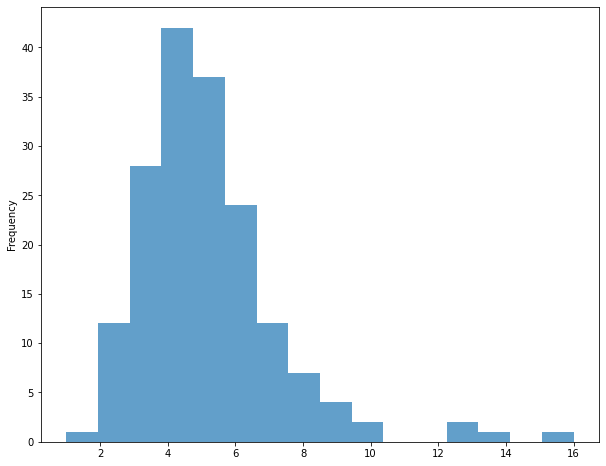

In [12]:
ax=dante['NumOfProv'].plot.hist(bins=16,figsize=(10, 8),alpha=0.7)